### Read MSRAction3D Dataset

In [1]:
from os import listdir
from os.path import join
import numpy as np
import bunch

In [44]:
def extract_label_from_filepath(data_path:str, file_path:str, act_ind:str):
    """
    Extract `label` from `file_path`
    :param: data_path: path of entire dataset
    :param: file_path: path of file for which we want to determine the label
    :param: act_ind: action label indicator
    :return: label: label extracted 
    """

    # remove the data_path from file_path to extract filename
    filename_nodir = ''.join(file_path).replace(data_path, '')

    # extract index where the act_ind is found from filename_nodir
    ind = int(filename_nodir.index(act_ind))

    # extract label from filename using index
    label = int(filename_nodir[ind+1:ind+3])
    return label

def read_data(data_path):
    """ read dataset from path"""
    dataset = {'data': [], 'labels': [], 'lengths': [], 'subjects': []}

    # extract path of each file
    filenames = [join(data_path, d)
                 for d in sorted(listdir(data_path))]
    
    # 
    for file in filenames:

        # extract and save label
        dataset['labels'].append(extract_label_from_filepath(data_path, file, 'a'))

        # extract and reshape actions 
        action = np.loadtxt(file)[:, :3].flatten()
        frame_size = len(action) // 60  # 20 landmarks x 3d points (x, y , z)
        
        dataset['lengths'].append(frame_size)
        dataset['data'].append(np.array(action).reshape(frame_size, 60))
        dataset['subjects'].append(extract_label_from_filepath(data_path, file, 's'))
    
    # data = np.asarray(data)
    dataset['labels'] = np.asarray(dataset['labels'])-1  # to start index at 0
    dataset['lengths'] = np.asarray(dataset['lengths'])
    dataset['subjects'] = np.asarray(dataset['subjects'])

    return dataset

In [45]:
# load dataset
data_path = 'dataset/MSRAction3DSkeleton(20joints)'
dataset = read_data(data_path)
data, labels = dataset['data'], dataset['labels']

print('Dataset extracted -----------')
print(f'\t Number of instances: {labels.shape[0]}')
print(f'\t Average n_frames per instance: {np.mean([data[i].shape[0] for i in range(len(data))]):0.2f}')

Dataset extracted -----------
	 Number of instances: 567
	 Average n_frames per instance: 40.21


In [59]:
# action descriptions
label_names = ['high arm wave', 'horizontal arm wave', 'hammer', 'hand catch', 'forward punch',
               'high throw', 'draw x', 'draw tick', 'draw circle', 'hand clap', 
               'two hand wave', 'side-boxing', 'bend', 'forward kick', 'side kick', 
               'jogging', 'tennis swing', 'tennis serve', 'golf swing', 'pick up & throw']
dataset['label_names'] = np.asarray(label_names)

# save dataset
np.save("MSRAction3DSkeleton(20joints)_dataset.npy", dataset)
dataset = np.load("MSRAction3DSkeleton(20joints)_dataset.npy", allow_pickle=True).item()
dataset.keys()

dict_keys(['data', 'labels', 'lengths', 'subjects', 'label_names'])

#### Visualize an Action

In [41]:
# import pandas
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [91]:
def load_data(action, subject, instance):
    # get index of data instance from dataset
    data_idx = int(np.where((dataset['labels'] == action) & (dataset['subjects'] == subject))[0][instance])
    print(f'Index of Action = {action}, Subject = {subject}, Instance = {instance}: {data_idx}')

    data = dataset['data'][data_idx]
    return data.reshape((data.shape[0]),20, 3)

In [140]:
# data instance parameters
action = 15
action_label = str(dataset['label_names'][action])
subject = 5
instance = 0

data = load_data(action, subject, instance)
action_label

Index of Action = 15, Subject = 5, Instance = 0: 429


'jogging'

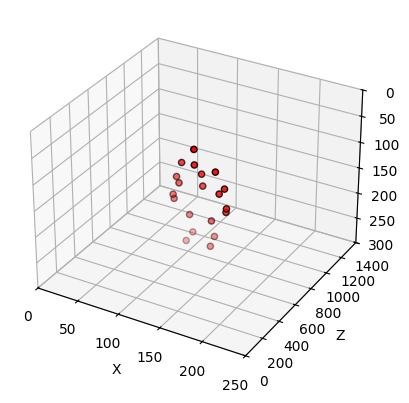

In [141]:
frame = 0

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

# Setting the axes properties
ax.set_xlim3d([0.0, 250.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1400.0])
ax.set_ylabel('Z')

ax.set_zlim3d([300.0, 0.0])
ax.set_zlabel('Y')

ax.scatter(data[frame,:,0], data[frame,:,2], data[frame,:,1], c='r', edgecolors='k')

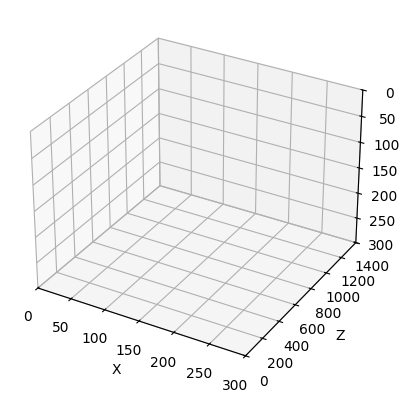

In [142]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

# Setting the axes properties
ax.set_xlim3d([0.0, 300.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1400.0])
ax.set_ylabel('Z')

ax.set_zlim3d([300.0, 0.0])
ax.set_zlabel('Y')

txt_title = ax.set_title('')
scatter_plot = ax.scatter([], [], [], c='r', edgecolors='k')

In [143]:
# animation function
def animate(i):
    scatter_plot._offsets3d = (data[i,:,0], data[i,:,2], data[i,:,1])
    txt_title.set_text("Frame: {0:2d}".format(i))
    return (scatter_plot, txt_title)

from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, animate, frames=data.shape[0], interval=100, blit=True)

In [144]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [145]:
anim.save('action_a{}s{}i{}_animation.mp4'.format(action, subject, instance))

#### Dispaly Animation Pipeline

In [152]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def load_data(action, subject, instance):
    # get index of data instance from dataset
    data_idx = int(np.where((dataset['labels'] == action) & (dataset['subjects'] == subject))[0][instance])
    print(f'Index of Action = {action}, Subject = {subject}, Instance = {instance}: {data_idx}')

    # extract data of action using index
    data = dataset['data'][data_idx]
    return data.reshape((data.shape[0]),20, 3)

def display_action(action, subject, instance, save_animation:bool=False):
    
    # -- Prepare figures and properties
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')

    # Setting the axes properties
    ax.set_xlim3d([0.0, 300.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([0.0, 1400.0])
    ax.set_ylabel('Z')

    ax.set_zlim3d([300.0, 0.0])
    ax.set_zlabel('Y')

    action_label = str(dataset['label_names'][action])
    txt_title = ax.set_title(f'')
    scatter_plot = ax.scatter([], [], [], c='r', edgecolors='k')
    
    # animation to draw each frame
    def animate(i):
        scatter_plot._offsets3d = (data[i,:,0], data[i,:,2], data[i,:,1])
        txt_title.set_text(f"{action_label.upper()} \n Frame: {i:2d}")
        return (scatter_plot, txt_title)

    # create data and animation object
    data = load_data(action, subject ,instance)
    anim = FuncAnimation(fig, animate, frames=data.shape[0], interval=100, blit=True)
    
    if save_animation:
        anim.save('animations/action_a{}s{}i{}_animation.mp4'.format(action, subject, instance))

    return anim

    # display animation
    HTML(anim.to_html5_video())

In [158]:
dataset['label_names']

array(['high arm wave', 'horizontal arm wave', 'hammer', 'hand catch',
       'forward punch', 'high throw', 'draw x', 'draw tick',
       'draw circle', 'hand clap', 'two hand wave', 'side-boxing', 'bend',
       'forward kick', 'side kick', 'jogging', 'tennis swing',
       'tennis serve', 'golf swing', 'pick up & throw'], dtype='<U19')

Index of Action = 17, Subject = 1, Instance = 1: 478


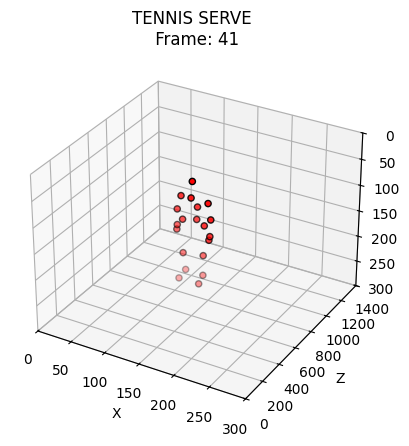

In [160]:
# data instance parameters
action = 17
subject = 1
instance = 1

anim = display_action(action, subject, instance, save_animation=True)

In [155]:
HTML(anim.to_html5_video())